In [1]:
import pandas as pd
import numpy as np
# import math

import libraries.covid_data as covid
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


imported covid_data.py


In c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
print("here")

here


In [3]:
nyt_county = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
pd.read_csv(nyt_county).head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
counties_df = covid.read_county_data_from_web()

In [5]:
counties_df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061,1,0
2020-01-22,Snohomish,Washington,53061,1,0
2020-01-23,Snohomish,Washington,53061,1,0
2020-01-24,Cook,Illinois,17031,1,0
2020-01-24,Snohomish,Washington,53061,1,0


In [6]:
ma_counties_df = counties_df[counties_df['state'] == 'Massachusetts']
ma_counties_df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-02-01,Suffolk,Massachusetts,25025,1,0
2020-02-02,Suffolk,Massachusetts,25025,1,0
2020-02-03,Suffolk,Massachusetts,25025,1,0
2020-02-04,Suffolk,Massachusetts,25025,1,0
2020-02-05,Suffolk,Massachusetts,25025,1,0


In [7]:
ma_counties_df['county'].unique()

array(['Suffolk', 'Norfolk', 'Middlesex', 'Berkshire', 'Worcester',
       'Essex', 'Barnstable', 'Bristol', 'Hampden', 'Plymouth', 'Unknown',
       'Franklin', 'Hampshire', 'Nantucket', 'Dukes'], dtype=object)

county
Barnstable    AxesSubplot(0.125,0.125;0.775x0.755)
Berkshire     AxesSubplot(0.125,0.125;0.775x0.755)
Bristol       AxesSubplot(0.125,0.125;0.775x0.755)
Dukes         AxesSubplot(0.125,0.125;0.775x0.755)
Essex         AxesSubplot(0.125,0.125;0.775x0.755)
Franklin      AxesSubplot(0.125,0.125;0.775x0.755)
Hampden       AxesSubplot(0.125,0.125;0.775x0.755)
Hampshire     AxesSubplot(0.125,0.125;0.775x0.755)
Middlesex     AxesSubplot(0.125,0.125;0.775x0.755)
Nantucket     AxesSubplot(0.125,0.125;0.775x0.755)
Norfolk       AxesSubplot(0.125,0.125;0.775x0.755)
Plymouth      AxesSubplot(0.125,0.125;0.775x0.755)
Suffolk       AxesSubplot(0.125,0.125;0.775x0.755)
Unknown       AxesSubplot(0.125,0.125;0.775x0.755)
Worcester     AxesSubplot(0.125,0.125;0.775x0.755)
Name: cases, dtype: object

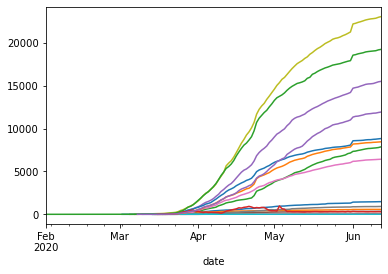

In [8]:
ma_counties_df.groupby('county')['cases'].plot()

In [9]:
df = ma_counties_df.groupby(['county','date'])['cases'].sum().unstack('county').fillna(0)
df

county,Barnstable,Berkshire,Bristol,Dukes,Essex,Franklin,Hampden,Hampshire,Middlesex,Nantucket,Norfolk,Plymouth,Suffolk,Unknown,Worcester
date,,,,,,,,,,,,,,,
2020-02-01,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-02-02,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-02-03,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-02-04,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2020-02-05,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-08,1458,575,7698,42,15236,338,6365,907,22812,13,8715,8372,19028,309,11758
2020-06-09,1462,575,7728,43,15271,341,6380,905,22845,13,8753,8404,19067,299,11803
2020-06-10,1467,574,7754,42,15365,344,6395,905,22889,13,8774,8418,19099,297,11820


In [10]:
for c in df.columns:
#     print(c)
    print(df[c].dtype)

Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64


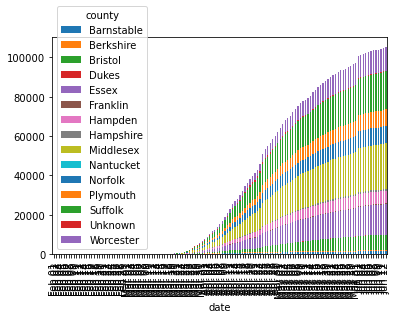

In [11]:
ax = df.plot(kind='bar', stacked=True)
x_labels = df.index.strftime('%b %d')
ax.set_xticklabels(x_labels)
plt.show()

In [12]:
# ax = df.plot.area()


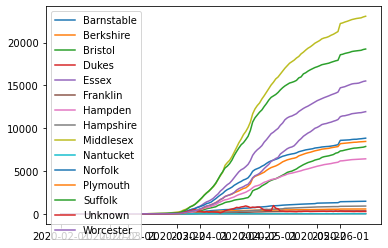

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(df.index, df, linestyle="-")
plt.legend(df.columns.values,loc='upper left')

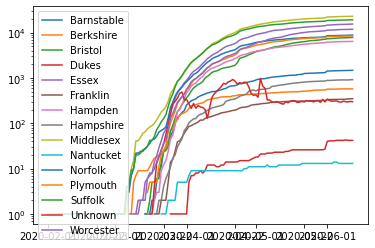

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

county_groups = ma_counties_df.groupby('county')
for name, county in county_groups:
#     print(name)
#     print(county.head())
#     print(county.index)
    plt.plot(county.index, county['cases'].astype('int'),linestyle="-", label=name)
    ax.legend()
plt.yscale('log')

In [15]:
for col in ['cases', 'deaths']:
#     cum_col = 'cumulative_' + col
#     us_df[cum_col] = us_df[col].cumsum()
    new_col = 'new_' + col
    ma_counties_df[new_col] = ma_counties_df[col] - ma_counties_df[col].shift(1).fillna(0)
#     ma_counties_df.loc[new_col] = ma_counties_df[col] - ma_counties_df[col].shift(1).fillna(0)
ma_counties_df = ma_counties_df.fillna(0)

ma_counties_df.head()

c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,county,state,fips,cases,deaths,new_cases,new_deaths
date,,,,,,,
2020-02-01,Suffolk,Massachusetts,25025,1,0,1,0
2020-02-02,Suffolk,Massachusetts,25025,1,0,0,0
2020-02-03,Suffolk,Massachusetts,25025,1,0,0,0
2020-02-04,Suffolk,Massachusetts,25025,1,0,0,0
2020-02-05,Suffolk,Massachusetts,25025,1,0,0,0


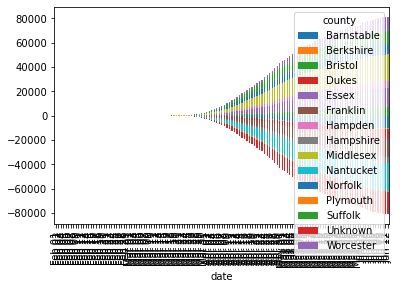

In [17]:
# ma_new_rolling_avg = ma_counties_df.groupby('county')['new_cases'].rolling(7).mean()
# ma_counties_df['weekly_new_cases']
# ma_counties_df['weekly_new_cases'] = ma_counties_df['weekly_new_cases'].fillna(0)
# ma_counties_df.tail()

df = ma_counties_df.groupby('county')['new_cases'].rolling(7).mean().unstack('county').fillna(0)
ax = df.plot(kind='bar', stacked=True)
x_labels = df.index.strftime('%b %d')
ax.set_xticklabels(x_labels)
plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ma_state_df.plot(x='cases',y='weekly_new_cases',ax=ax)

# x = np.array(ma_state_df.cases.values,dtype=float)
# y = np.array(ma_state_df.weekly_new_cases.values,dtype=float)
# m, b = np.polyfit(x, y, 1)
# # plt. plot(x, y, 'o') create scatter plot.
# ax.plot(x, m*x + b) 
# plt.yscale('log')
# plt.xscale('log')

### Country Level Summation

In [18]:
active_counties_df = counties_df[counties_df['cases']>=100]
active_counties_df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-03-09,King,Washington,53033,117,21
2020-03-10,Westchester,New York,36119,107,0
2020-03-10,King,Washington,53033,191,23
2020-03-11,Westchester,New York,36119,120,0
2020-03-11,King,Washington,53033,235,27


In [19]:
county_count = active_counties_df.groupby('date')['county'].nunique()

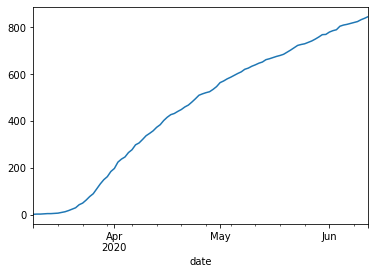

In [20]:
county_count.plot()

In [21]:
# Cedar Hill
ellis_df = counties_df[(counties_df['county'] == 'Ellis') & (counties_df['state'] == 'Texas')]
ellis_df.tail()

,county,state,fips,cases,deaths
date,,,,,
2020-06-08,Ellis,Texas,48139,364,16
2020-06-09,Ellis,Texas,48139,399,16
2020-06-10,Ellis,Texas,48139,418,18
2020-06-11,Ellis,Texas,48139,429,18
2020-06-12,Ellis,Texas,48139,437,18


In [22]:
120 // 100
active_counties_df['bin'] = active_counties_df['cases'] // 1000 * 1000
# active_counties_df['bin'] = np.log(active_counties_df['cases'])
active_counties_df.head()

c:\users\vinny\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,county,state,fips,cases,deaths,bin
date,,,,,,
2020-03-09,King,Washington,53033,117,21,0
2020-03-10,Westchester,New York,36119,107,0,0
2020-03-10,King,Washington,53033,191,23,0
2020-03-11,Westchester,New York,36119,120,0,0
2020-03-11,King,Washington,53033,235,27,0


In [23]:
bin_count = active_counties_df.groupby(['date','bin'])['county'].nunique()
bin_count.columns = ['count']
bin_count.head()

date        bin
2020-03-09  0      1
2020-03-10  0      2
2020-03-11  0      2
2020-03-12  0      3
2020-03-13  0      4
Name: county, dtype: int64

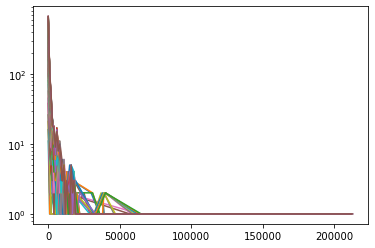

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

for date, new_df in bin_count.groupby(level=0):
    ax.plot(new_df.droplevel(level=0))
plt.yscale('log')

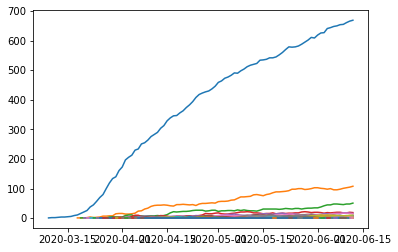

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

for date, new_df in bin_count.groupby(level=1):
#     print(new_df.droplevel(level=1))
    ax.plot(new_df.droplevel(level=1))

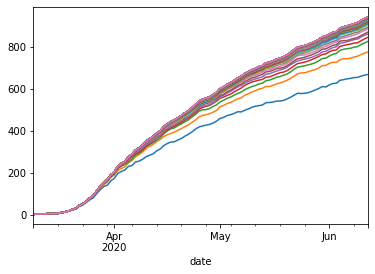

In [26]:
data = pd.Series(bin_count)
data = data.unstack(level=-1)
data.plot(stacked=True, legend = False)

In [27]:
# for name, county in bin_count:
#     print(name)
# #     print(county.head())
# #     print(county.index)
#     plt.plot(county.index, county['cases'].astype('int'),linestyle="-", label=name)
#     ax.legend()
# plt.yscale('log')

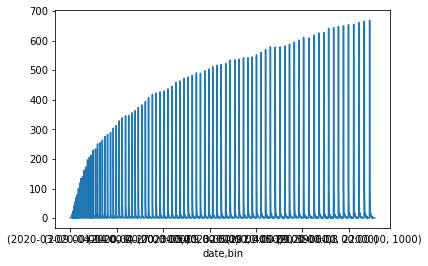

In [28]:
bin_count.plot()

In [29]:
usa_df = counties_df.groupby('date')[['cases', 'deaths']].sum()
for col in ['cases', 'deaths']:
#     cum_col = 'cumulative_' + col
#     us_df[cum_col] = us_df[col].cumsum()
    new_col = 'new_' + col
    usa_df[new_col] = usa_df[col] - usa_df[col].shift(1).fillna(0)
#     ma_counties_df.loc[new_col] = ma_counties_df[col] - ma_counties_df[col].shift(1).fillna(0)
usa_df = usa_df.fillna(0)
usa_df.tail()

,cases,deaths,new_cases,new_deaths
date,,,,
2020-06-08,1971337,111144,18198,722
2020-06-09,1990122,112174,18785,1030
2020-06-10,2010961,113095,20839,921
2020-06-11,2034116,113973,23155,878
2020-06-12,2059588,114753,25472,780


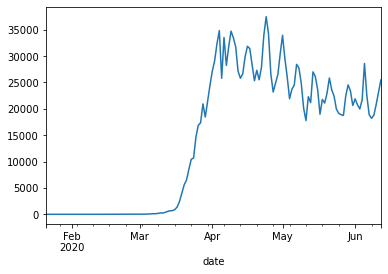

In [30]:
usa_df['new_cases'].plot()

### State-level Data

In [31]:
state_df = counties_df.groupby(['state','date'])[['cases',  'deaths']].sum()
state_df.head()

cases  deaths
state   date                     
Alabama 2020-03-13      6       0
        2020-03-14     12       0
        2020-03-15     23       0
        2020-03-16     29       0
        2020-03-17     39       0

In [32]:
state_df = state_df[state_df['cases'] >= 50]

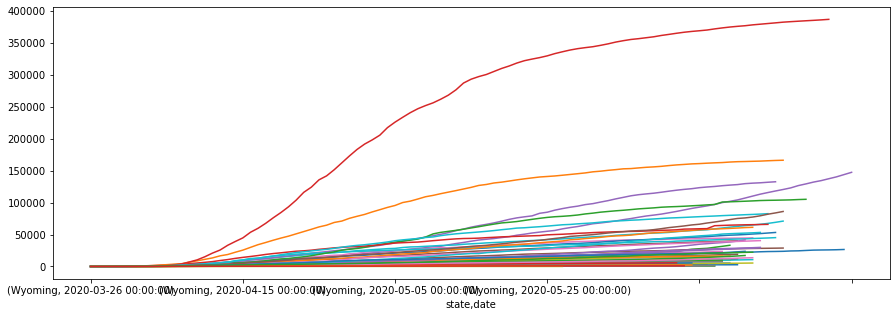

In [33]:
state_df.groupby('state')['cases'].plot(figsize=(15,5))
# plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

In [34]:
for col in ['cases', 'deaths']:
#     cum_col = 'cumulative_' + col
#     us_df[cum_col] = us_df[col].cumsum()
    new_col = 'new_' + col
    state_df[new_col] = state_df[col] - state_df[col].shift(1).fillna(0)
    state_df = state_df[state_df[new_col] >= 0]
#     ma_counties_df.loc[new_col] = ma_counties_df[col] - ma_counties_df[col].shift(1).fillna(0)
state_df = state_df.fillna(0)

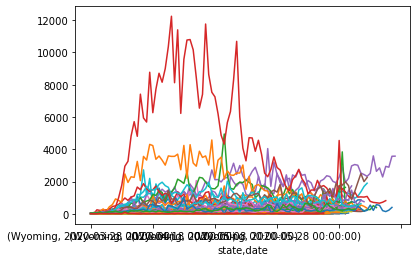

In [35]:
state_df.groupby('state')['new_cases'].plot()
plt.rcParams['figure.figsize'] = [20, 5]

In [36]:
df = state_df.groupby(['state','date'])['cases'].sum().unstack('state').fillna(0)
df.tail()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-06-08,20925,607,27761,9740,134287,28169,44092,9972,9389,64896,...,27217,77326,12378,1075,71,51251,25593,2161,21161,960
2020-06-09,21422,620,28396,10080,137230,28333,44179,10020,9474,65992,...,27865,79271,12639,1084,71,51738,25796,2179,21435,970
2020-06-10,21989,642,29981,10368,140123,28484,44347,10056,9537,67363,...,28379,81771,12982,1095,72,52177,25940,2193,21772,980
2020-06-11,22845,664,31525,10816,143693,28632,44461,10106,9589,69061,...,28766,83772,13366,1110,72,52647,26172,2217,22049,1009
2020-06-12,23710,688,33167,11547,147269,28807,44689,10173,9654,70963,...,29218,86031,13681,1119,72,53211,26576,2249,22345,1027


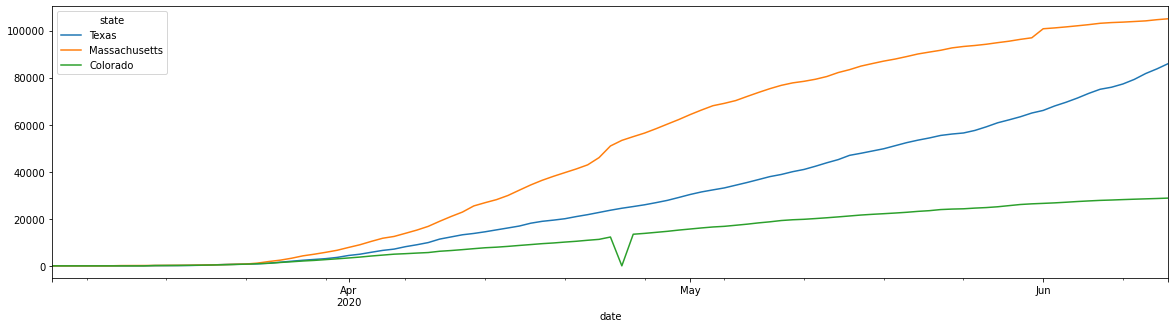

In [37]:
df[['Texas','Massachusetts','Colorado']].plot()
plt.rcParams['figure.figsize'] = [15, 5]

In [38]:
df = state_df.groupby(['state','date'])['cases'].sum().unstack('state').fillna(0)
df.tail()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-06-08,20925,607,27761,9740,134287,28169,44092,9972,9389,64896,...,27217,77326,12378,1075,71,51251,25593,2161,21161,960
2020-06-09,21422,620,28396,10080,137230,28333,44179,10020,9474,65992,...,27865,79271,12639,1084,71,51738,25796,2179,21435,970
2020-06-10,21989,642,29981,10368,140123,28484,44347,10056,9537,67363,...,28379,81771,12982,1095,72,52177,25940,2193,21772,980
2020-06-11,22845,664,31525,10816,143693,28632,44461,10106,9589,69061,...,28766,83772,13366,1110,72,52647,26172,2217,22049,1009
2020-06-12,23710,688,33167,11547,147269,28807,44689,10173,9654,70963,...,29218,86031,13681,1119,72,53211,26576,2249,22345,1027


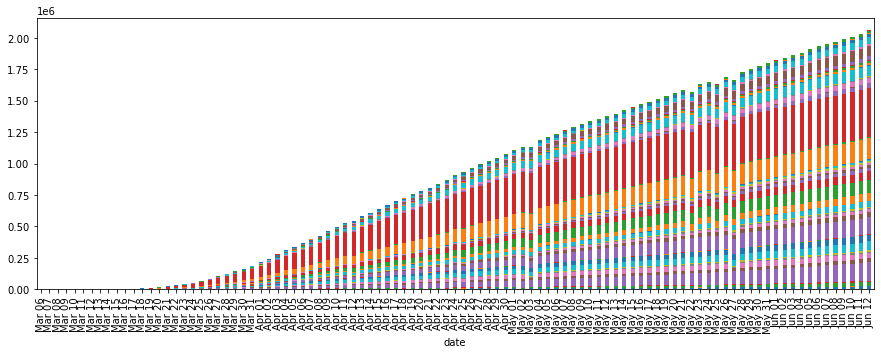

In [39]:
ax = df.plot(kind='bar', stacked=True, legend=False)
x_labels = df.index.strftime('%b %d')
ax.set_xticklabels(x_labels)
plt.show()

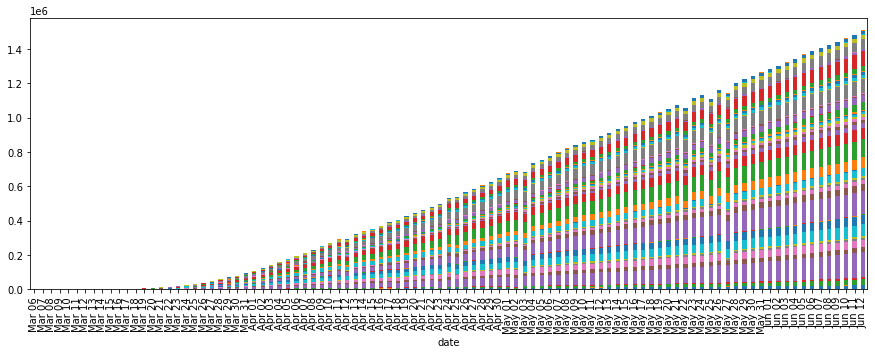

In [40]:
df = state_df.groupby(['state','date'])['cases'].sum().unstack('state').fillna(0)
df = df.drop('New York', 1)
df = df.drop('New Jersey', 1)
ax = df.plot(kind='bar', stacked=True, legend=False)
x_labels = df.index.strftime('%b %d')
ax.set_xticklabels(x_labels)
plt.show()

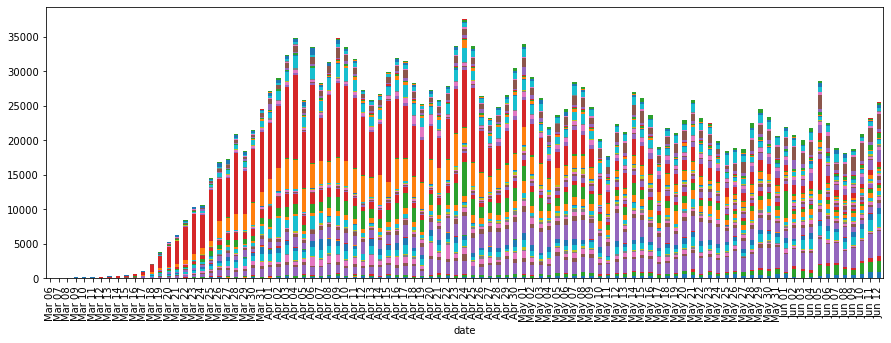

In [41]:
df = state_df.groupby(['state','date'])['new_cases'].sum().unstack('state').fillna(0)
ax = df.plot(kind='bar', stacked=True, legend=False)
x_labels = df.index.strftime('%b %d')
ax.set_xticklabels(x_labels)
plt.show()

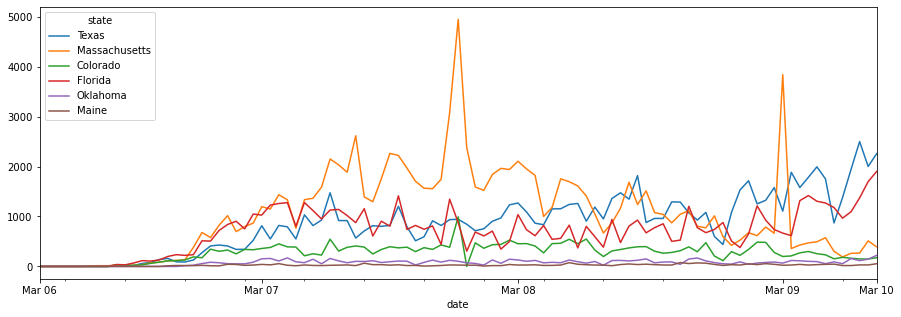

In [51]:
df = state_df.groupby(['state','date'])['new_cases'].sum().unstack('state').fillna(0)
ax = df[['Texas','Massachusetts','Colorado','Florida','Oklahoma','Maine']].plot()
x_labels = df.index.strftime('%b %d')
ax.set_xticklabels(x_labels)
plt.show()
plt.rcParams['figure.figsize'] = [15, 5]

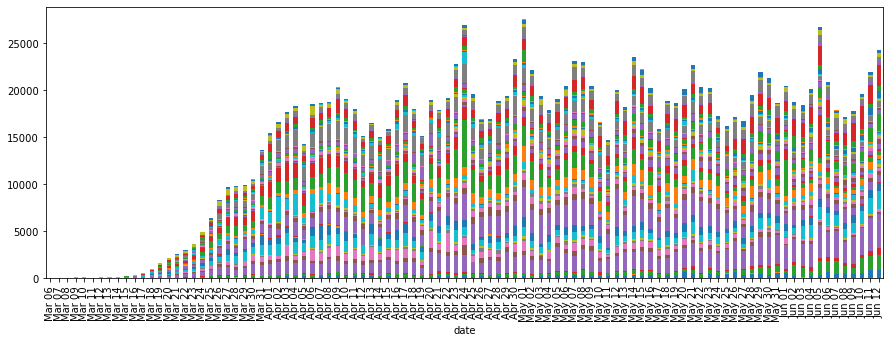

In [42]:
df = state_df.groupby(['state','date'])['new_cases'].sum().unstack('state').fillna(0)
df = df.drop('New York', 1)
df = df.drop('New Jersey', 1)
ax = df.plot(kind='bar', stacked=True, legend=False)
x_labels = df.index.strftime('%b %d')
ax.set_xticklabels(x_labels)
plt.show()

In [43]:
# Need to fix the overlapping rolling window with previous state
state_df['weekly_new_cases'] = state_df['new_cases'].rolling(window=7,center=False).sum().astype('Int64')
state_df['weekly_new_cases'] = state_df['weekly_new_cases'].fillna(0)
state_df.tail()

cases  deaths  new_cases  new_deaths  weekly_new_cases
state   date                                                              
Wyoming 2020-06-08    960      17         13           0                50
        2020-06-09    970      17         10           0                58
        2020-06-10    980      18         10           1                65
        2020-06-11   1009      18         29           0                88
        2020-06-12   1027      18         18           0                94

In [44]:
state_df[state_df["weekly_new_cases"].isna()]

,,cases,deaths,new_cases,new_deaths,weekly_new_cases
state,date,,,,,


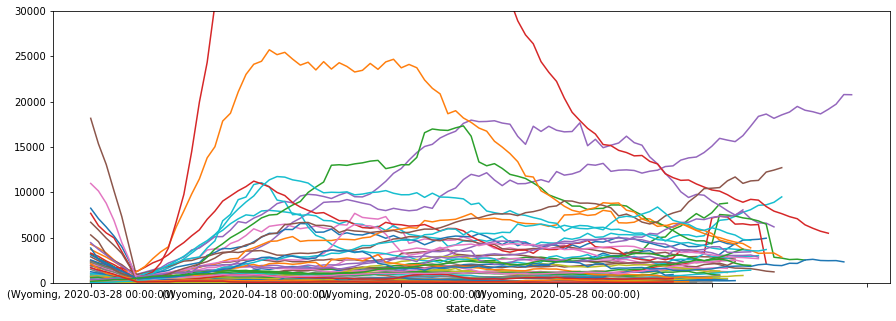

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plt.plot(state_df.index, state_df.groupby('state')['weekly_new_cases'],linestyle="-", label=name)
# ax.legend()

state_df.groupby('state')['weekly_new_cases'].plot()
plt.ylim(0, 30000)
plt.rcParams['figure.figsize'] = [15, 5]
# ax.legend('state')
# ax.plot(usa_df.index, usa_df['new_cases'].values)

In [46]:
# grouped = state_df['new_cases'].rolling(window=14,center=False).sum().astype('Int64')
# grouped

for state, new_df in state_df.groupby(level=0):
    state_df.loc[state, 'biweekly_new_cases'] = new_df['new_cases'].rolling(window=14,center=False).sum().astype('Int64')
    
#     print(state)
state_df['biweekly_new_cases'] = state_df['biweekly_new_cases'].fillna(0)
state_df

ValueError: cannot convert to 'float64'-dtype NumPy array with missing values. Specify an appropriate 'na_value' for this dtype.

In [ ]:
#TODO fix the overlapping rolling window with previous state
# state_df['biweekly_new_cases'] = state_df.groupby(level='state')['new_cases'].rolling(window=14,center=False).sum().astype('Int64')
# state_df['biweekly_new_cases'] = state_df['biweekly_new_cases'].fillna(0)
# state_df.tail()

In [ ]:
state_df.groupby('state')['biweekly_new_cases']

In [ ]:
state_df.groupby('state')['biweekly_new_cases'].plot()
# plt.ylim(0, 50000)
plt.rcParams['figure.figsize'] = [15, 5]
# ax.legend(state_df['state'])

In [ ]:
df = state_df['weekly_new_cases'].unstack(0)
df.sort_index(inplace=True)

df = df.fillna(0)
df.plot()
plt.ylim(0, 30000)

In [ ]:
counter = 0
fig, axs = plt.subplots(11, 5)
for column in df:
#     print(df[column].values)
    ax = axs[counter//5, counter%5]
    ax.bar(df.index, df[column].values)
    ax.set_title(column)
#     ax.fill_between(df.index, df[column].values, facecolor='yellow', alpha=0.5)
#     ax1.fill_betweenx(y, x1, x2, where=x2 >= x1, facecolor='green')
    
#     axs[counter//5, counter%5].plot(range(0,10), range(0,10))
    counter += 1
# axs[0, 0].set_title('Axis [0, 0]')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)
# fig.tight_layout()

In [ ]:
df = state_df['weekly_new_cases'].unstack(0)
df.index = [ts.strftime('%b 20%y') for ts in df.index]
df.fillna(0)
df.plot()

In [ ]:
ma_counties_df.groupby('county')['cases']

In [ ]:
ma_counties_df.index

In [ ]:
ma_state_df = ma_counties_df[['cases',  'deaths', 'new_cases', 'new_deaths']].groupby(ma_counties_df.index).sum()
ma_state_df = ma_state_df[ma_state_df['cases'] > 20]

In [ ]:
# Resampling examples
# weekly_date_indices = pd.date_range(ma_state_df.index[0], dt.datetime.today() + dt.timedelta(7), freq='W-MON')
# temp = ma_state_df.groupby(pd.cut(ma_state_df.index, weekly_date_indices, right=False)).agg({'new_cases': pd.Series.sum})
# temp.head()
# temp = ma_state_df['new_cases'].resample('W').sum()
# temp.head()

In [ ]:
ma_state_df['weekly_new_cases'] = ma_state_df['new_cases'].rolling(window=7,center=False).sum().astype('Int64')
ma_state_df['weekly_new_cases'] = ma_state_df['weekly_new_cases'].fillna(0)
ma_state_df.tail()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ma_state_df.plot(ax=ax)
plt.yscale('log')

In [ ]:
ma_state_df.weekly_new_cases.values
ma_state_df.cases.values

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ma_state_df.plot(x='cases',y='weekly_new_cases',ax=ax)

x = np.array(ma_state_df.cases.values,dtype=float)
y = np.array(ma_state_df.weekly_new_cases.values,dtype=float)
m, b = np.polyfit(x, y, 1)
# plt. plot(x, y, 'o') create scatter plot.
ax.plot(x, m*x + b) 
plt.yscale('log')
plt.xscale('log')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ma_state_df.plot(x='cases',y='weekly_new_cases',ax=ax)

x = np.array(ma_state_df.cases.values,dtype=float)
y = np.array(ma_state_df.weekly_new_cases.values,dtype=float)
m, b = np.polyfit(x, y, 1)
# plt. plot(x, y, 'o') create scatter plot.
ax.plot(x, m*x + b) 

In [ ]:
counties_df.head()

In [ ]:
counties_df = active_counties_df
country_df = counties_df.groupby('date')['cases'].sum()
# country_df.head()
country_but_ny = counties_df[counties_df['state'] != "New York"].groupby('date')['cases'].sum()
# country_but_ny.head()
ny_df = counties_df[counties_df['state'] == "New York"].groupby('date')['cases'].sum()

# country_df.index

fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(country_df.index, country_df.values)
ax.plot(country_but_ny.index, country_but_ny.values)
ax.plot(ny_df.index, ny_df.values)
plt.yscale('log')